## Importing Libraries and Reading .csv file

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import date, datetime, timedelta

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("D:\\Copper_Set.xlsx")
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [6]:
df.shape

(181673, 14)

## Data Cleaning 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


### Correcting the datatypes and format of features

In [4]:
# this is very important to find any other valuse other than numeric in these columns if any then it will be converted into null
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')

In [8]:
# df['item_date_'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
# df['delivery date_'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date

In [5]:
df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('0000') else x)

In [9]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [10]:
df.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [6]:
# the selling_price and quantity tons columns have negative values but which can not be negative
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)

### Treating null & duplicated values

In [7]:
df.isnull().sum()

id                    2
item_date             1
quantity tons         5
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     100645
product_ref           0
delivery date         1
selling_price         8
dtype: int64

In [8]:
(df.isnull().sum()/len(df))*100

id                0.001101
item_date         0.000550
quantity tons     0.002752
customer          0.000550
country           0.015412
status            0.001101
item type         0.000000
application       0.013211
thickness         0.000550
width             0.000000
material_ref     55.398986
product_ref       0.000000
delivery date     0.000550
selling_price     0.004404
dtype: float64

In [9]:
df['id'].nunique()

181671

In [10]:
df['material_ref'].nunique()

11495

In [11]:
# 'id' column is not necessary 
# 'material_ref' column has more than 50% null values 
df = df.drop(['id','material_ref'], axis=1)
# with the size of dataset the number of null values are insignificant so, will drop the null valued rows 
df = df.dropna()

In [12]:
df['item_date'] = df['item_date'].astype('int64')
df['delivery date'] = df['delivery date'].astype('int64')

In [13]:
df['item_date'].nunique()

252

In [14]:
df['customer'] = df['customer'].astype('int64')
df['application'] = df['application'].astype('int64')
df['country'] = df['country'].astype('int64')

In [15]:
df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
df = df.drop_duplicates()

In [23]:
df.shape

(181626, 12)

In [24]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,20210401,54.151139,30156308,28,Won,W,10,2.00,1500.0,1670798778,20210701,854.00
1,20210401,768.024839,30202938,25,Won,W,41,0.80,1210.0,1668701718,20210401,1047.00
2,20210401,386.127949,30153963,30,Won,WI,28,0.38,952.0,628377,20210101,644.33
3,20210401,202.411065,30349574,32,Won,S,59,2.30,1317.0,1668701718,20210101,768.00
4,20210401,785.526262,30211560,28,Won,W,10,4.00,2000.0,640665,20210301,577.00


### Checking the distribution of data and treating outliers

In [25]:
# to find the skewness of each column in the dataset 
df.skew()

item_date         -0.526852
quantity tons    424.635878
customer        -149.086728
country            0.753542
application        0.724385
thickness         15.303009
width              0.374822
product_ref        1.015063
delivery date    404.905585
selling_price    301.349100
dtype: float64

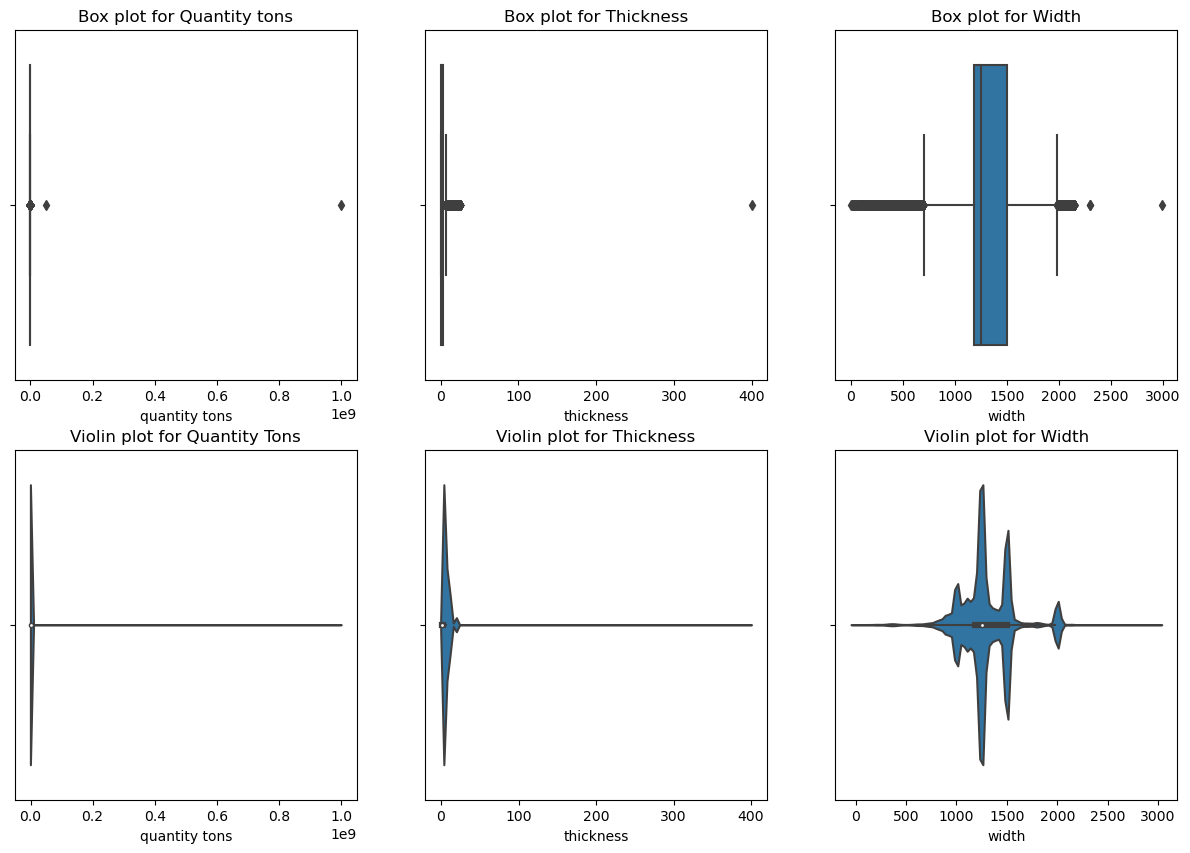

In [28]:
# Before outlier Treatment
plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='quantity tons')
plt.title('Box plot for Quantity tons')

plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='thickness')
plt.title('Box plot for Thickness')

plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='width')
plt.title('Box plot for Width')


plt.subplot(2, 3, 4)
sns.violinplot(data=df, x='quantity tons')
plt.title('Violin plot for Quantity Tons')

plt.subplot(2, 3, 5)
sns.violinplot(data=df, x='thickness')
plt.title('Violin plot for Thickness')

plt.subplot(2, 3, 6)
sns.violinplot(data=df, x='width')
plt.title('Violin plot for Width')


plt.show()

#### Outlier Treatment

In [18]:
def iqr_outlier(df,column):
    q3 = df[column].quantile(0.75)
    q1 = df[column].quantile(0.25)
    iqr = q3-q1
    upper_threashold = q3+(1.5*iqr)
    lower_threashold = q1-(1.5*iqr)
    df[column] = df[column].clip(lower_threashold, upper_threashold)


In [19]:
# only the columns with continous datas has to be treated for outliers and rest others are categorical 
iqr_outlier(df, 'quantity tons')
iqr_outlier(df, 'thickness')
iqr_outlier(df, 'width')

In [20]:
# after iqr outlier treatment the skewness has reduced 
df.skew()

item_date         -0.526852
quantity tons      1.121774
customer        -149.086728
country            0.753542
application        0.724385
thickness          1.061341
width              0.669509
product_ref        1.015063
delivery date    404.905585
selling_price    301.349100
dtype: float64

In [21]:
# Target variable seems to highly skwed so applying log transformation
df['selling_price'] = np.log(df['selling_price'])

In [22]:
df.skew()

item_date         -0.526852
quantity tons      1.121774
customer        -149.086728
country            0.753542
application        0.724385
thickness          1.061341
width              0.669509
product_ref        1.015063
delivery date    404.905585
selling_price     -5.342816
dtype: float64

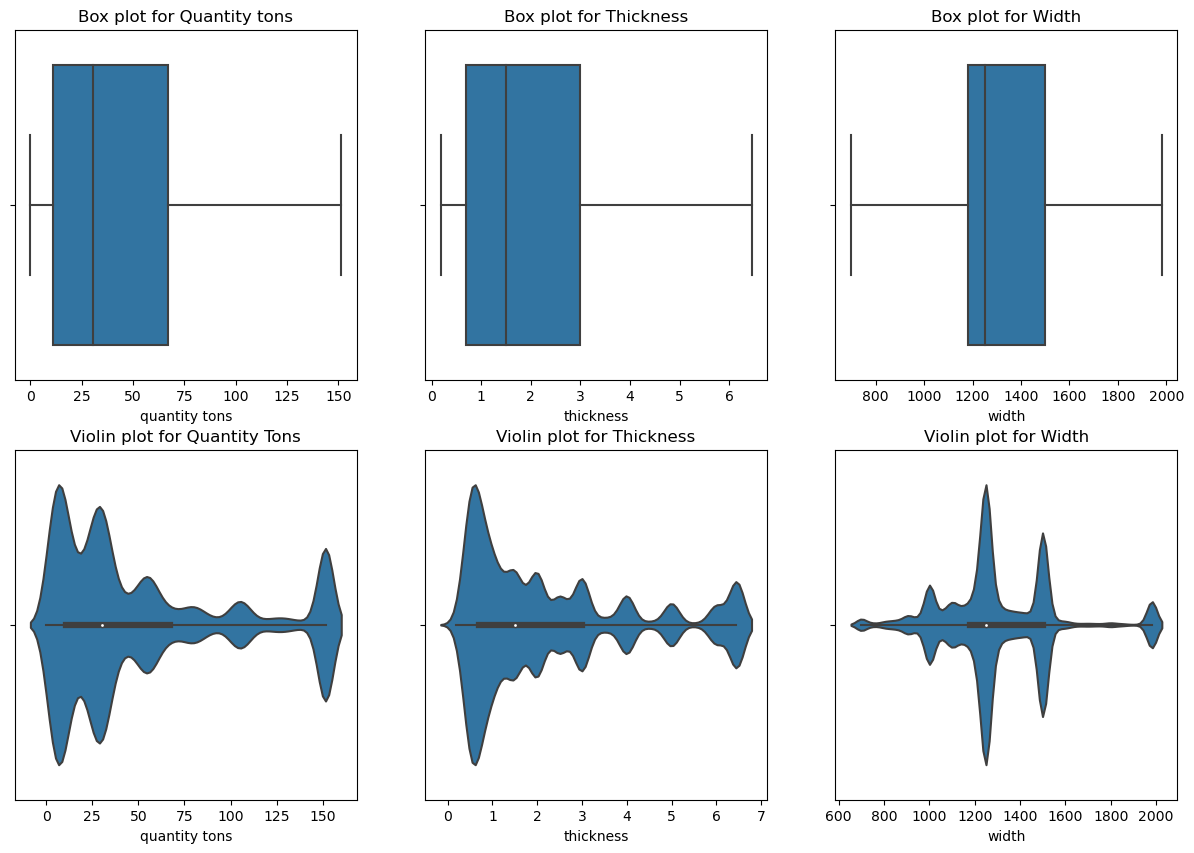

In [34]:
# After outlier Treatment and log transformation
plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='quantity tons')
plt.title('Box plot for Quantity tons')

plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='thickness')
plt.title('Box plot for Thickness')

plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='width')
plt.title('Box plot for Width')


plt.subplot(2, 3, 4)
sns.violinplot(data=df, x='quantity tons')
plt.title('Violin plot for Quantity Tons')

plt.subplot(2, 3, 5)
sns.violinplot(data=df, x='thickness')
plt.title('Violin plot for Thickness')

plt.subplot(2, 3, 6)
sns.violinplot(data=df, x='width')
plt.title('Violin plot for Width')


plt.show()

## Exploratory Data Anlysis

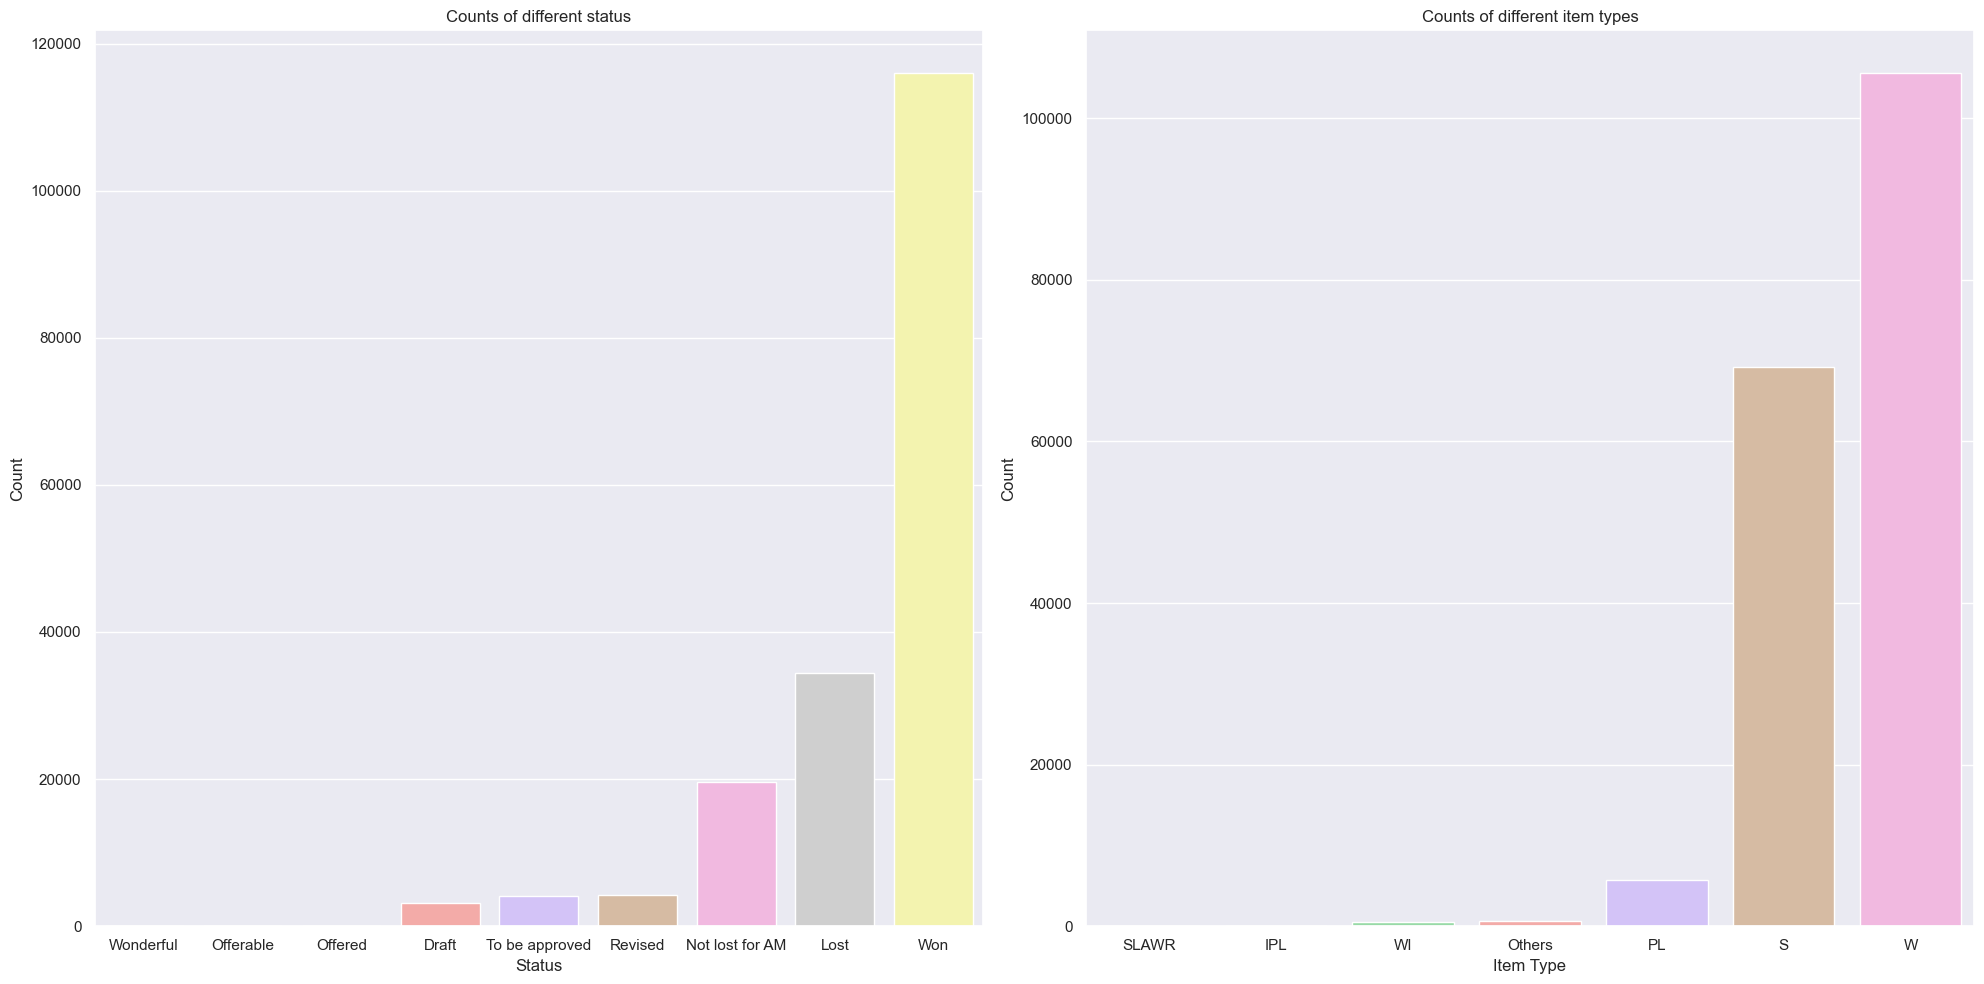

In [35]:
# Categorical features vs target variable relation
sns.set_theme(style='darkgrid', palette='pastel')
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='status', order=df['status'].value_counts().index[::-1])
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Counts of different status')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='item type', order=df['item type'].value_counts().index[::-1])
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.title('Counts of different item types')

plt.tight_layout()
plt.show()

In [36]:
status_order = df.groupby('status')['selling_price'].mean().reset_index().sort_values('selling_price')['status']
item_type_order = df.groupby('item type')['selling_price'].mean().reset_index().sort_values('selling_price')['item type']

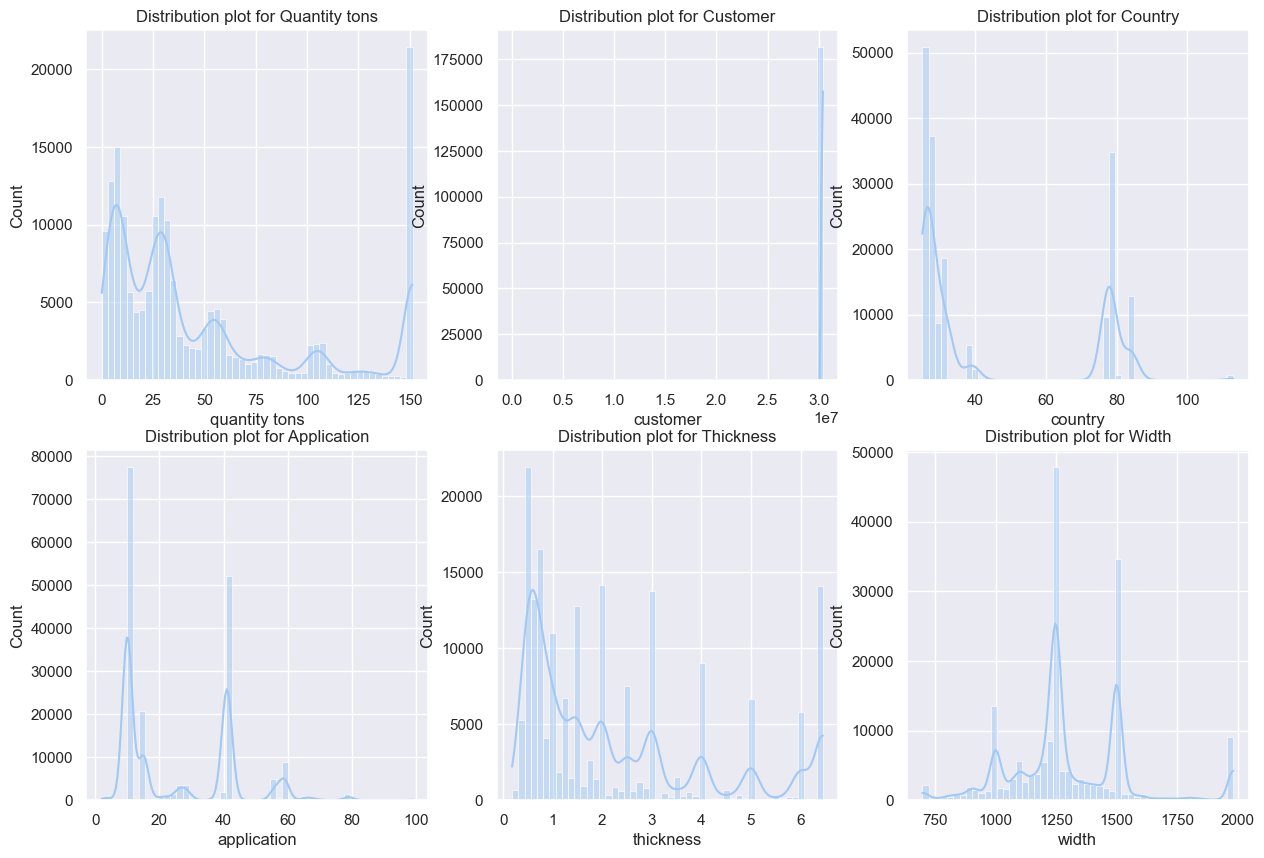

In [37]:
# Continous features distribution  
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(data=df, x='quantity tons', kde=True, bins=50)
plt.title('Distribution plot for Quantity tons')

plt.subplot(2, 3, 2)
sns.histplot(data=df, x='customer', kde=True, bins=50)
plt.title('Distribution plot for Customer')

plt.subplot(2, 3, 3)
sns.histplot(data=df, x='country', kde=True, bins=50)
plt.title('Distribution plot for Country')

plt.subplot(2, 3, 4)
sns.histplot(data=df, x='application', kde=True, bins=50)
plt.title('Distribution plot for Application')

plt.subplot(2, 3, 5)
sns.histplot(data=df, x='thickness', kde=True, bins=50)
plt.title('Distribution plot for Thickness')

plt.subplot(2, 3, 6)
sns.histplot(data=df, x='width', kde=True, bins=50)
plt.title('Distribution plot for Width')

plt.show()


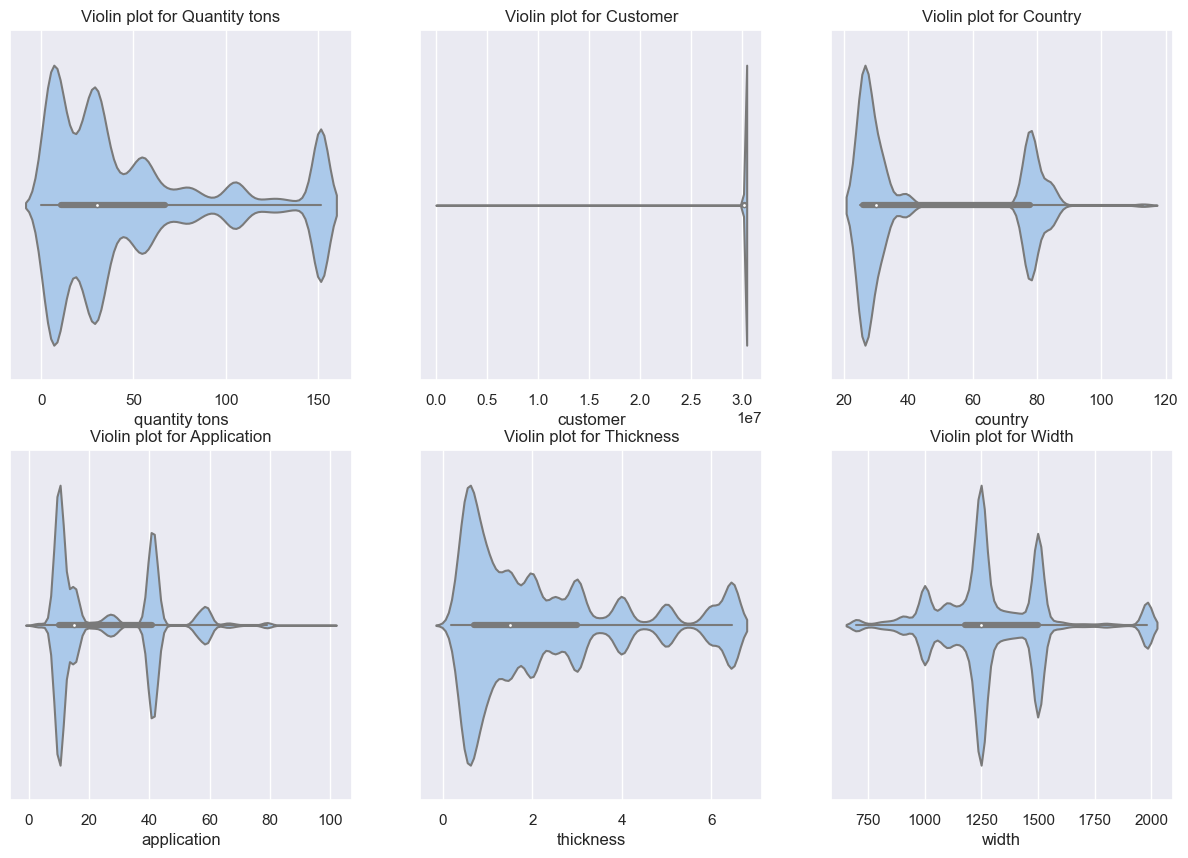

In [38]:
# violin plots of continous features to know their spreadness
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.violinplot(data=df, x='quantity tons')
plt.title('Violin plot for Quantity tons')

plt.subplot(2, 3, 2)
sns.violinplot(data=df, x='customer')
plt.title('Violin plot for Customer')

plt.subplot(2, 3, 3)
sns.violinplot(data=df, x='country')
plt.title('Violin plot for Country')

plt.subplot(2, 3, 4)
sns.violinplot(data=df, x='application')
plt.title('Violin plot for Application')

plt.subplot(2, 3, 5)
sns.violinplot(data=df, x='thickness')
plt.title('Violin plot for Thickness')

plt.subplot(2, 3, 6)
sns.violinplot(data=df, x='width')
plt.title('Violin plot for Width')

plt.show()

### Converting textual Categorical datas into numeric using label encoding

In [23]:
df1 = df.copy()
df2 = df.copy()

In [24]:
df1['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [25]:
df1['status'].value_counts()

Won                115999
Lost                34432
Not lost for AM     19566
Revised              4276
To be approved       4169
Draft                3120
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

In [26]:
df1['status'] = df1['status'].replace({'Won':8, 'Lost':7, 'Not lost for AM':6, 'Revised':5, 'To be approved':4, 'Draft':3, 'Offered':2, 'Offerable':1, 'Wonderful':0})

In [27]:
df1['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [28]:
df1['item type'].value_counts()

W         105602
S          69203
PL          5659
Others       610
WI           524
IPL           27
SLAWR          1
Name: item type, dtype: int64

In [29]:
df1['item type'] = df1['item type'].replace({'SLAWR':0, 'IPL':1,  'WI':2, 'Others':3, 'PL':4, 'S':5, 'W':6})

### Checking the relationship between Features and Target

<Axes: >

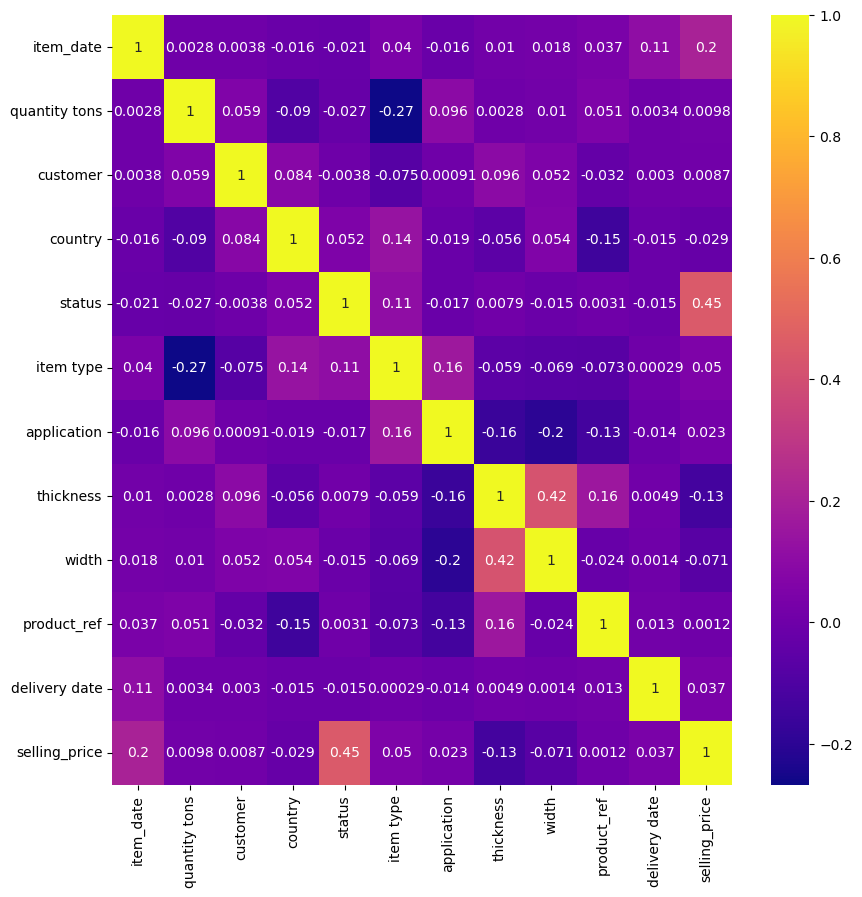

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), fmt='.2g',annot=True, cmap='plasma')

### From the above correlation matrix found that:

In [55]:
# Feature 'thickness' and 'width' are correlated but both are independent variable so either one should be dropped
# Feature 'item_date' have no relation with target 'selling_price' as correlation factor is around 0.2
# Without 'item_date' 'delivery date' has no meaning so dropping both features
# Feature 'status' has the highest coorelation with the target 'selling_price'

In [31]:
# droppping features with less correlation with target 
# also droppping fetures that are correlated with each other
df1 = df1.drop(['width','item_date','delivery date'], axis=1)
df2 = df2.drop(['width','item_date','delivery date'], axis=1)

In [32]:
df1.head()

,quantity tons,customer,country,status,item type,application,thickness,product_ref,selling_price
0,54.151139,30156308,28,8,6,10,2.00,1670798778,6.749931
1,151.451581,30202938,25,8,6,41,0.80,1668701718,6.953684
2,151.451581,30153963,30,8,2,28,0.38,628377,6.468211
3,151.451581,30349574,32,8,5,59,2.30,1668701718,6.643790
4,151.451581,30211560,28,8,6,10,4.00,640665,6.357842


### Splitting the data into Train and Test

In [33]:
# training and testing data split for regression model
from sklearn.model_selection import train_test_split    
xr = df1.drop('selling_price', axis=1)
yr = df1['selling_price']
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(xr,yr,test_size=0.2, random_state=42)

In [34]:
print(x_train_r.shape)
print(y_train_r.shape)
print(x_test_r.shape)
print(y_test_r.shape)

(145300, 8)
(145300,)
(36326, 8)
(36326,)


## Regression Model - To predict Selling Price

In [35]:
# python libraries required for this regression model building
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import pickle

In [36]:
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
xgr = XGBRegressor()

In [66]:
# by using r2_score and cross validation score selecting the best model for this regression problem
models = [dtr, rfr, xgr]
score = []

for model in models:
    xr = df1.drop('selling_price', axis=1)
    yr = df1['selling_price']
    x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(xr,yr,test_size=0.2, random_state=42)
    
    model.fit(x_train_r,y_train_r)
    y_pred_r = model.predict(x_test_r)
    r2_test = r2_score(y_test_r, y_pred_r)
    cv_score = cross_val_score(model, x_train_r, y_train_r, cv=10).mean()
    Score = {'Model':str(model).split('(')[0], 'R2_Score':r2_test, 'CV_Score':cv_score}
    score.append(Score)

In [54]:
# selecting the best algorithm for this regression problem
best_model = pd.DataFrame(score)
best_model

,Model,R2_Score,CV_Score
0,DecisionTreeRegressor,0.888733,0.885274
1,RandomForestRegressor,0.926069,0.924751
2,XGBRegressor,0.916173,0.917576


<!-- RandomForestRegressor has the highest r2_score but the XGBRegressor has the highest Cross Val Score. 

So based on cross_val_score XGBRegressor is chosen as the best model -->

In [ ]:
# out of all RandomForestRegressor has the highest r2_score and croo validation score 

In [81]:
# by using grid search cv finding the best hyperparameters for  RandomForestRegressor
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(xr,yr,test_size=0.2, random_state=42)
grid_search_r = GridSearchCV(estimator = rfr, 
                             param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20],
                                           'min_samples_split': [2, 5, 10], 'max_features': [None, 'sqrt', 'log2']},
                             n_jobs=-1, verbose = True, cv=5)
grid_search_r.fit(x_train_r, y_train_r)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=True)

In [82]:
# getting the best hyperparameters for RandomForestRegressor
grid_search_r.best_params_

{'max_depth': 20,
 'max_features': None,
 'min_samples_split': 10,
 'n_estimators': 200}

In [83]:
# the score of the model with best hyperparameters
grid_search_r.best_score_

0.9296546311824192

In [84]:
# fitting the training datas with the best hyperparameters of random forest regressor 
xr = df1.drop('selling_price', axis=1)
yr = df1['selling_price']
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(xr,yr,test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(max_depth= 20, max_features= None, min_samples_split= 10, n_estimators= 200)
rf_regressor.fit(x_train_r, y_train_r)


RandomForestRegressor(max_depth=20, max_features=None, min_samples_split=10,
                      n_estimators=200)

In [85]:
# cross validation score of the regression model
cross_val_score(rf_regressor, x_train_r, y_train_r, cv=10).mean()

0.9304248102293243

In [125]:
# Regression metrics
y_test_pred_r = rf_regressor.predict(x_test_r)

mse = mean_squared_error(y_test_r,y_test_pred_r)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_r,y_test_pred_r)
r2 = r2_score(y_test_r,y_test_pred_r)

In [142]:
r_metrics = { 'R2 Score' : r2, 'Mean Squared Error' : mse, 'Root Mean Squared Error' : rmse, 'Mean Absolute Error' : mae}
pd.DataFrame(list(r_metrics.items()), columns=['Metrics', 'Values'])

,Metrics,Values
0,R2 Score,0.930988
1,Mean Squared Error,0.021774
2,Root Mean Squared Error,0.147561
3,Mean Absolute Error,0.107810


In [101]:
# pickling the regression model as a file 
with open(r'D:\ZEN\Copper_Modelling\Regression_model_selling_price.pkl', 'wb') as file:
    pickle.dump(rf_regressor, file)

In [102]:
# loading the pickled regression model
with open(r'D:\ZEN\Copper_Modelling\Regression_model_selling_price.pkl', 'rb') as file:
    price = pickle.load(file)

In [103]:
# checking the accuracy of the regression model for predicting the selling price
data_r = list(x_train_r.iloc[1])
x1 = np.array([data_r])
y1 = price.predict(x1)
y1[0], np.exp(y1[0])

(6.61697463574324, 747.6796686216611)

In [104]:
y_train_r.iloc[1], np.exp(y_train_r.iloc[1])

(6.548219102762372, 698.0)

## Classification Model - To Predict Status

In [106]:
# python libraries required for this classification model building
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

In [38]:
df_c = df2.copy()

In [39]:
df2.shape

(181626, 9)

In [40]:
# selecting only the required categories for the target variable
df2 = df2[(df2['status']=='Won') | (df2['status']=='Lost')]

In [41]:
# label encoding the categorical classes
df2['status'] = df2['status'].replace({'Lost':0, 'Won':1}) 
df2['item type'] = df2['item type'].replace({'SLAWR':0, 'IPL':1,  'WI':2, 'Others':3, 'PL':4, 'S':5, 'W':6})

In [42]:
df2.shape

(150431, 9)

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150431 entries, 0 to 181672
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  150431 non-null  float64
 1   customer       150431 non-null  int64  
 2   country        150431 non-null  int64  
 3   status         150431 non-null  int64  
 4   item type      150431 non-null  int64  
 5   application    150431 non-null  int64  
 6   thickness      150431 non-null  float64
 7   product_ref    150431 non-null  int64  
 8   selling_price  150431 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 11.5 MB


In [44]:
df2.head()

,quantity tons,customer,country,status,item type,application,thickness,product_ref,selling_price
0,54.151139,30156308,28,1,6,10,2.00,1670798778,6.749931
1,151.451581,30202938,25,1,6,41,0.80,1668701718,6.953684
2,151.451581,30153963,30,1,2,28,0.38,628377,6.468211
3,151.451581,30349574,32,1,5,59,2.30,1668701718,6.643790
4,151.451581,30211560,28,1,6,10,4.00,640665,6.357842


In [45]:
df2['status'].value_counts()

1    115999
0     34432
Name: status, dtype: int64

In [58]:
# the categories in target column seems to be unbalanced
# applying SMOTE technique to balance the tadrget column's categories

x = df2.drop('status', axis=1)
y = df2['status']

smote = SMOTE(sampling_strategy=.40,random_state=2)
x_smote, y_smote = smote.fit_resample(x, y)

In [70]:
x.shape, y.shape, xc.shape, yc.shape

((150431, 8), (150431,), (162398, 8), (162398,))

In [71]:
y_smote.value_counts()

1    115999
0     46399
Name: status, dtype: int64

In [48]:
# training and testing data split for classification
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(xc,yc,test_size=0.2, random_state=42)

In [49]:
# instancing the ML algorithms for classification problem
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
xgc = XGBClassifier()

In [80]:
# by using accuracy and cross validation score selecting the best model for this classification problem
c_models = [dtc, rfc, xgc]
c_score = []

for model in c_models:
    x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(xc,yc,test_size=0.2, random_state=42)
    
    model.fit(x_train_c, y_train_c)
    y_pred_c = model.predict(x_test_c)
    accuracy_test = accuracy_score(y_test_c, y_pred_c)
    cv_score_c = cross_val_score(model, x_train_c, y_train_c, cv=10).mean()
    C_Score = {'Model':str(model).split('(')[0], 'Accuracy_Score':accuracy_test, 'CV_Score':cv_score_c}
    c_score.append(C_Score)

In [81]:
# finding the best model with highest accuracy and cross validation score
best_model_c = pd.DataFrame(c_score)
best_model_c

,Model,Accuracy_Score,CV_Score
0,DecisionTreeClassifier,0.946994,0.943889
1,RandomForestClassifier,0.967422,0.964340
2,XGBClassifier,0.914838,0.915728


In [ ]:
# thus RandomForestClassifier has the highest Accuracy_Score and CV_Score - selected as the best model

In [75]:
# by using grid search cv finding the best hyperparameters for  RandomForestClassifier
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(xc, yc, test_size=0.2, random_state=42)

grid_search_c = GridSearchCV(estimator = rfc, 
                             param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20],
                                           'min_samples_split': [2, 5, 10], 'max_features': [None, 'sqrt', 'log2']},
                             n_jobs=-1, verbose = True, cv=5)

grid_search_c.fit(x_train_c, y_train_c)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=True)

In [77]:
# the best hyper parameters for  random forest classifier
grid_search_c.best_params_

{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 200}

In [78]:
# model's score for using these best hyperparameters
grid_search_c.best_score_

0.9342816341975398

In [79]:
# fitting the training datas with RandomForestClassifier with the best hyperparameters
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(xc,yc,test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators= 200, min_samples_split = 2, max_features ='log2', max_depth = 20)
rf_classifier.fit(x_train_c, y_train_c)

RandomForestClassifier(max_depth=20, max_features='log2', n_estimators=200)

In [80]:
# cross validation score for this model
cross_val_score(rf_classifier, x_train_c, y_train_c, cv=10).mean()

0.9362058982051993

In [119]:
# Accuracy score for training and testing data prdiction
y_pred_train_c = rf_classifier.predict(x_train_c)
y_pred_test_c = rf_classifier.predict(x_test_c)
accuracy_train = accuracy_score(y_train_c, y_pred_train_c)
accuracy_test = accuracy_score(y_test_c, y_pred_test_c)
accuracy_train, accuracy_test

(0.964716093066729, 0.9648166280932883)

In [123]:
print(confusion_matrix(y_test_c, y_pred_test_c))

[[21320  1358]
 [  223 22035]]


In [122]:
print(classification_report(y_test_c, y_pred_test_c))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     22678
           1       0.94      0.99      0.97     22258

    accuracy                           0.96     44936
   macro avg       0.97      0.97      0.96     44936
weighted avg       0.97      0.96      0.96     44936



In [97]:
# pickling the classification model as a file
with open(r'D:\ZEN\Copper_Modelling\Classification_model_status.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)

In [98]:
# loaing the pickled classification model 
with open(r'D:\ZEN\Copper_Modelling\Classification_model_status.pkl', 'rb') as file:
    status = pickle.load(file)

In [99]:
# checking the accuracy of the regression model for predicting the selling price
data_c = list(x_train_c.iloc[1])
x2 = np.array([data_c])
y2 = status.predict(x2)
y2[0], np.exp(y2[0])

(1, 2.718281828459045)

In [100]:
y_train_c.iloc[1], np.exp(y_train_c.iloc[1])

(1, 2.718281828459045)